# **附录4：关于神经网络（Neural Networks, NN）**


Madmom 节拍分析使用的是循环神经网络（Recurrent Neural Network, RNN），为了更好地理解 RNN，首先需要理解神经网络（Neural Networks，NN）。

&emsp;

## **阅读材料推荐**

神经网络到底指什么，下面这几篇教程或文档讲得必定比我好，所以先把他们放上来，供阅读参考：

&emsp;

1. **伯克利机器学习速成课程系列（Machine Learning Crash Course）**

    这是 Machine Learning @ Berkeley 发表在 Medium 上的一系列文章，共 5 篇，说是速成课程，更准确地描述可能是通识课程，以 **不使用数学公式** 的方式、生动活泼地讲解机器学习相关的一些概念，具体到神经网络主题，前 3 篇相关度最高。非常适合作为最初的入门阅读材料。

    + [系列 1：回归（Regression）/分类（Classification），损失函数（Cost Function）和梯度下降（Gradient Descent）](https://medium.com/@ml.at.berkeley/machine-learning-crash-course-part-1-9377322b3042?source=---------5----------------------------)

    + [系列2：支持向量机（Support Vector Machines, SVM）, 感知机（Perceptron）和逻辑蒂斯回归（Logistic Regression）](https://medium.com/@ml.at.berkeley/machine-learning-crash-course-part-2-3046b4a7f943)

    + [系列3：神经网络（Neural Networks）](https://medium.com/@ml.at.berkeley/machine-learning-crash-course-part-3-4a5bfd72294a)

&emsp;

2. **[神经网络与深度学习（Neural Networks and Deep Learning)](http://neuralnetworksanddeeplearning.com/index.html)**

    **五星强烈推荐！**
    
    说是书，其实是由 6 篇长文构成，所以先不要被体量吓到；其次不要被文章内的数学公式和篇幅吓到，都是有充分原因的。（我最初就被吓到了，多人推荐阅读但一直拖延没有看。）**一切都是为了把神经网络是什么讲得清清楚楚**（后面深度学习的部分还没看）。如果你想要彻底理解神经网络，且已有 python 基础，这个系列的文章极大可能会让你喜出望外。

    中文版在[这里](https://github.com/Xovee/simplified-chinese-translation-of-neural-networks-and-deep-learning)。
    
    这个笔记本的内容主要基于第 1、2 章：
    
    + [第 1 章：使用神经网络识别手写数字](http://neuralnetworksanddeeplearning.com/chap1.html)
    
    + [第 2 章：反向传播算法是如何工作的](http://neuralnetworksanddeeplearning.com/chap2.html)

&emsp;

3. **[从零开始使用 Python 构建一个神经网络(Implementing a Neural Network from Scratch in Python)](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/)**

    这也是一个系列的指南，从基本的神经网络构建开始，后面还有循环神经网络的示例。在阅读 2 之前，先跟着这篇教程的代码操作了一遍，比较之下，还是 2 更好。
    
&emsp;    

4. **[计算图上的微积分：反向传播（Calculus on Computational Graphs: Backpropagation）](http://colah.github.io/posts/2015-08-Backprop/)**

    **五星推荐！**
    
    这位作者同样也非常善于清晰友好地讲解复杂概念，这篇文章旨在帮助读者从直觉上理解反向传播这一核心概念，对数学依赖很少。

&emsp;

## **神经网络构建示例：使用神经网络识别手写数字**

以下代码是 **[神经网络与深度学习（Neural Networks and Deep Learning)](http://neuralnetworksanddeeplearning.com/index.html)** 教材中第一、二章配套的示例 [Python 代码](https://github.com/mnielsen/neural-networks-and-deep-learning)，因原代码是 python 2.0 所以改动了几处使符合 python 3.0 语法规范。

**以便利的数据格式和结构调用训练和测验数据**

In [1]:
"""
mnist_loader
~~~~~~~~~~~~
这部分代码的功能是以适当的数据结构和格式加载 MNIST 图像数据。这些图片全是手写数字（0-9），要训练的神经网络模型
就是要根据图片判断具体是哪个数字。其中 50000 张图片用作神经网络训练数据集（training set），10000 张用作训练时
的验证数据集（validation set），另还有 10000 张图片用作测试数据集（testing set）。

数据文件 mnist.pkl.gz 存放在仓库内 data 文件夹下。
"""

import pickle
import gzip
import numpy as np

def load_data():
    """
    以元组的形式返回训练数据、验证数据和测试数据
    
    training_data 返回的是由两个元素构成的元组：第一个元素存放的是 50000 张图片数据，即一个由
    50000 个元素构成的数组（numpy ndarry），每一元素又是一个包含 28*28=784 个像素值的数组；元组中的第二个元素也是
    一个由 50000 个元素构成的数组，存放的是每张图片（元组的第一个元素）对应的数字（0-9）
    
    validation_data 以及 test_data 的结构是相同的，只是数量分别都是 10000 个
    
    为了方便神经网络使用，后面 load_data_wrapper 函数又进一步对数据格式做了一点调整

    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data


def load_data_wrapper():
    """
    基于 load_data 函数，返回一个元组，由 (training_data、validation_data、test_data) 三个元素构成，
    更方便后面构建神经网络时使用。
 
    具体地，training_data 是一个列表，包含 50000 个二元元组(x,y)。x 是一个 784 维的数组（numpy.ndarray），存放图片
    数据；y 是一个 10 维的数组，存放表示 x 对应数字的单位向量。
    
    validation_data 以及 test_data 是包含 10000 个二元元组(x,y) 的列表。x 都是一个 784 维的数组，存放图片数据；y 
    对应的则是分类，即 x 对应的数字的值（整数）。
    
    所以，训练数据与验证/测试数据的格式略有不同，都是为了方便构建的神经网络使用。
    """
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    # 下面这三行是从 python2.0 至 python 3.0 做的改动
    test_data = list(test_data)
    training_data = list(training_data)
    validation_data = list(validation_data)
    return training_data, validation_data, test_data

def vectorized_result(j):
    """
    返回一个 10 维的单位向量，j 位放 1.0，其余位置为 0。这是为了将某一个数字（0-9）转换成后面神经网络所需的输出数据。
    即用[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 表示数字 0，用 [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0]表示数字 1，依次类推。
    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [2]:
training_data, validation_data, test_data = load_data_wrapper()

&emsp;

**待交待：**

+ 神经网络的基本构成

+ w 和 b 表示什么

+ 概念解释：学习速率，epoch，batch，随机梯度下降，反向传播算法

&emsp;

**构建神经网络**


In [3]:
import numpy as np
import random


class Network(object):
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)  #sizes 是一个列表，每一个元素对应神经网络的一层，交待的是每一层分别有多少个神经元
        self.sizes = sizes
        # w 和 b 的初始值是从均值为 0，标准差为 1 的正态分布中随机抽取的
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
      
                        
    def feedforward(self, a):
        """
        数据在神经网络内正向传播的数学表达式
        即数据 a 经加权求和即 wa 再加上偏差 b，作为某一层的输入数据，经激活函数 sigmoid，输出值又成为下一层的输入数据 a
        """
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
   
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """
        随机梯度下降（Stochastic Gradient Descent)定义
        eta 是学习速率（learning rate）
        epochs 可以理解为以完整训练数据进行训练的次数，mini_batch_size 则是每一次完整训练分割为多大的单位进行
        """
        if test_data: n_test = len(test_data)    # 每一个 epoch 结束后，是否在测验数据中做测验
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)  # 每一个 epoch 初始时都先将全部数据随机化
            mini_batches = [               # 按 mini_batch_size 将全部数据分成 mini_batches
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            for mini_batch in mini_batches:   # 在每一个 mini_batch 内通过反向传播更新所有 w 和 b
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))
    
                        
    def update_mini_batch(self, mini_batch, eta):
        """
        通过反向传播算法实现梯度下降，更新 b 和 w 值
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
    
                        
    def backprop(self, x, y):
        """
        反向传播算法
        
        先正向传播（feedforward），输入数据从输入层到隐藏层，再从隐藏层到输出层，得到输出数据
        activations[-1] 即为输出层输出的结果，会拿来与 training_data 中的 y 算损失函数
        
        再反向传播（backpropagation），首先根据损失函数与输出层激活函数求得输出层神经元误差，即 delta，进一步求得
        输出层的 nabla_b 和 nabla_w；再根据另一个公式继续反向推进，根据输出层（即本层的下一层）的 w、误差以及隐藏层的
        激活函数求得本曾的 nabla_b 和 nabla_w，以此继续反向推进（本例只含有一层隐藏层，因此到此为止）
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        activation = x
        activations = [x]
        zs = []
        # 正向传播
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # 反向传播
        # 下面 delta 计算的是输出层神经元的误差，即损失函数的导数（a-y）乘以输出层激活函数的导数
        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(zs[-1])   
        # nabla_b 和 delta 相等，直接使用其值
        # nabla_w 等与 delta 乘以上一层神经元的输出值
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # 继续反向向隐藏层推进根据神经元误差计算 nabla_b 和 nabla_w
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            # 公式改变，下一层的 w 乘以下一层的误差再与本层的激活函数的导数相乘
            delta = np.dot(self.weights[-l+1].transpose(), delta)*sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w
                        
    
    def evaluate(self, test_data):
        """
        在测验数据中测试神经网络的效果
        """
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x==y) for (x, y) in test_results)
    
                        
    def cost_derivative(self, output_activations, y):
        """
        输入数据经正向传播从输出层输出的结果与实际 y 之间的偏差
        """
        return (output_activations-y)
                        

        
def sigmoid(z):
    """
    激活函数 sigmoid 的表达式，作用是平滑 0/1 二分分类/判断
    """
    return 1.0/(1.0+np.exp(-z))
                        
def sigmoid_prime(z):
    """
    sigmoid 的导数
    """
    return sigmoid(z)*(1-sigmoid(z))

In [6]:
# 输入层 784 个神经元，中间层 30 个神经元，输出层 10 个神经元

net = Network([784, 30, 10])   

In [7]:
# 对全体训练数据做 SGD，重复 30 次（epochs），以 10 个数据为 1 个 mini_batch，学习速率是 3.0
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9082 / 10000
Epoch 1: 9233 / 10000
Epoch 2: 9330 / 10000
Epoch 3: 9277 / 10000
Epoch 4: 9362 / 10000
Epoch 5: 9382 / 10000
Epoch 6: 9364 / 10000
Epoch 7: 9410 / 10000
Epoch 8: 9420 / 10000
Epoch 9: 9391 / 10000
Epoch 10: 9431 / 10000
Epoch 11: 9409 / 10000
Epoch 12: 9424 / 10000
Epoch 13: 9417 / 10000
Epoch 14: 9454 / 10000
Epoch 15: 9433 / 10000
Epoch 16: 9434 / 10000
Epoch 17: 9459 / 10000
Epoch 18: 9441 / 10000
Epoch 19: 9425 / 10000
Epoch 20: 9441 / 10000
Epoch 21: 9419 / 10000
Epoch 22: 9454 / 10000
Epoch 23: 9451 / 10000
Epoch 24: 9455 / 10000
Epoch 25: 9446 / 10000
Epoch 26: 9455 / 10000
Epoch 27: 9442 / 10000
Epoch 28: 9449 / 10000
Epoch 29: 9440 / 10000


&emsp;

### **附：反向传播 4 公式**

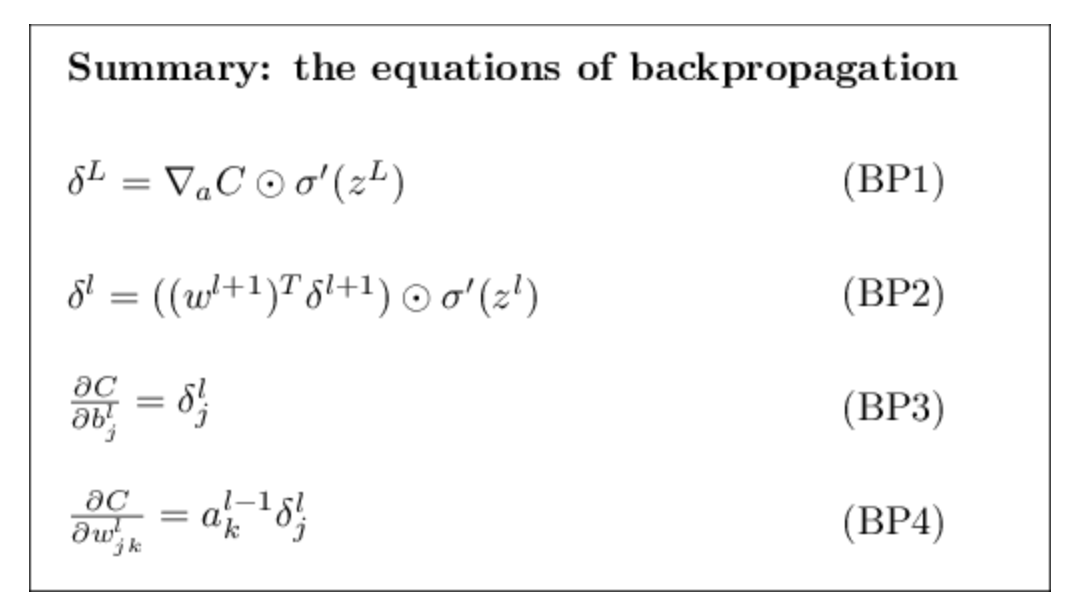